In [2]:
import ast
import numpy as np
import pandas as pd

df = pd.read_csv("Datos_estaciones.csv", sep = ",")

# Columnas que contienen diccionarios como strings
dict_columns = [
    'genero_x_mes',
    'edad_x_mes',
    'duraciones_x_mes',
    'dias_x_mes',
    'horas_x_mes',
    'viajes_x_mes'
]

# Función para convertir los textos a diccionarios, para usar como distribuciones discretas
def text_to_dict(text):
    try:
        return ast.literal_eval(text)
    except (ValueError, SyntaxError):
        return {}

# Aplicar la función a las columnas especificadas
for col in dict_columns:
    df[col] = df[col].apply(text_to_dict)

df.head()

Estacion                                genero_x_mes  \
0         1  {'M': 11305.17, 'F': 4236.67, 'O': 177.67}   
1         2      {'M': 4764.5, 'F': 1733.17, 'O': 83.5}   
2         3    {'M': 5133.17, 'F': 1948.0, 'O': 122.34}   
3         4      {'M': 6255.0, 'F': 2534.0, 'O': 85.33}   
4         5     {'M': 6823.0, 'F': 2592.5, 'O': 154.84}   

                                          edad_x_mes  \
0  {'<20': 181.5, '20-30': 4719.0, '30-40': 6119....   
1  {'<20': 30.67, '20-30': 1990.0, '30-40': 2827....   
2  {'<20': 140.0, '20-30': 3195.83, '30-40': 2451...   
3  {'<20': 59.67, '20-30': 2939.67, '30-40': 3839...   
4  {'<20': 77.5, '20-30': 3182.67, '30-40': 4070....   

                                    duraciones_x_mes  \
0  {'0-10': 6820.67, '10-20': 5727.33, '20-30': 2...   
1  {'0-10': 2134.17, '10-20': 2882.33, '20-30': 1...   
2  {'0-10': 2733.0, '10-20': 2360.0, '20-30': 947...   
3  {'0-10': 3164.0, '10-20': 3681.0, '20-30': 133...   
4  {'0-10': 3037.0, '10-20': 4302.5, '20-30': 147...   

                                          dias_x_mes  \
0  {'Monday': 2437.67, 'Tuesday': 2629.67, 'Wedne...   
1  {'Monday': 1020.17, 'Tuesday': 1110.67, 'Wedne...   
2  {'Monday': 1001.67, 'Tuesday': 1098.33, 'Wedne...   
3  {'Monday': 1285.0, 'Tuesday': 1467.5, 'Wednesd...   
4  {'Monday': 1410.33, 'Tuesday': 1581.5, 'Wednes...   

                                         horas_x_mes  \
0  {0: 89.83, 1: 0.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...   
1  {0: 63.17, 1: 2.5, 2: 0.33, 3: 0.0, 4: 0.0, 5:...   
2  {0: 54.33, 1: 1.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...   
3  {0: 67.5, 1: 0.83, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...   
4  {0: 55.17, 1: 1.0, 2: 0.33, 3: 0.17, 4: 0.0, 5...   

                                        viajes_x_mes  retiros_x_mes  \
0  {'2024-10': 17855, '2024-11': 16465, '2024-12'...        9426.83   
1  {'2024-10': 7277, '2024-11': 6991, '2024-12': ...        2232.50   
2  {'2024-10': 7802, '2024-11': 7620, '2024-12': ...        4748.67   
3  {'2024-10': 9799, '2024-11': 9041, '2024-12': ...        3265.83   
4  {'2024-10': 10805, '2024-11': 10180, '2024-12'...        1566.17   

   arribos_x_mes  
0        6931.33  
1        2503.00  
2        4741.17  
3        3656.67  
4        1552.67

In [3]:
# Normalizar los datos de cada diccionario que representa una distribución discreta
def normalize_dict(d):
    total = sum(d.values())
    if total > 0:
        return {k: v / total for k, v in d.items()}
    return d

# Normalizar las columnas que contienen diccionarios
for col in dict_columns:
    df[col] = df[col].apply(normalize_dict)

df.head()

Estacion                                       genero_x_mes  \
0         1  {'M': 0.7191808141602378, 'F': 0.2695166706850...   
1         2  {'M': 0.7239594175503747, 'F': 0.2633528688667...   
2         3  {'M': 0.7125928887445148, 'F': 0.2704237239901...   
3         4  {'M': 0.7048419429973869, 'F': 0.2855426832222...   
4         5  {'M': 0.7129318289632343, 'F': 0.2708890175270...   

                                          edad_x_mes  \
0  {'<20': 0.011546051250472339, '20-30': 0.30019...   
1  {'<20': 0.004660265575877846, '20-30': 0.30237...   
2  {'<20': 0.019435050836540117, '20-30': 0.44365...   
3  {'<20': 0.006723880311099191, '20-30': 0.33125...   
4  {'<20': 0.008097944376003753, '20-30': 0.33255...   

                                    duraciones_x_mes  \
0  {'0-10': 0.43389396851206163, '10-20': 0.36434...   
1  {'0-10': 0.32428428379756186, '10-20': 0.43796...   
2  {'0-10': 0.37939837662472875, '10-20': 0.32761...   
3  {'0-10': 0.35653395805655186, '10-20': 0.41479...   
4  {'0-10': 0.31733459835282757, '10-20': 0.44956...   

                                          dias_x_mes  \
0  {'Monday': 0.15507122282387428, 'Tuesday': 0.1...   
1  {'Monday': 0.15501323470866926, 'Tuesday': 0.1...   
2  {'Monday': 0.13905323800930103, 'Tuesday': 0.1...   
3  {'Monday': 0.1447996637492633, 'Tuesday': 0.16...   
4  {'Monday': 0.14736482441044352, 'Tuesday': 0.1...   

                                         horas_x_mes  \
0  {0: 0.0057144965511362516, 1: 3.18072834862309...   
1  {0: 0.009598611794881145, 1: 0.000379872241367...   
2  {0: 0.007542198412709431, 1: 0.000208232976607...   
3  {0: 0.007606199446944787, 1: 9.352808208835811...   
4  {0: 0.005764685476169081, 1: 0.000104489495671...   

                                        viajes_x_mes  retiros_x_mes  \
0  {'2024-10': 0.1893063890243644, '2024-11': 0.1...        9426.83   
1  {'2024-10': 0.1842885000126624, '2024-11': 0.1...        2232.50   
2  {'2024-10': 0.180514101941186, '2024-11': 0.17...        4748.67   
3  {'2024-10': 0.18403260338804792, '2024-11': 0....        3265.83   
4  {'2024-10': 0.1881682978649298, '2024-11': 0.1...        1566.17   

   arribos_x_mes  
0        6931.33  
1        2503.00  
2        4741.17  
3        3656.67  
4        1552.67

In [7]:
# Obtener una matriz de distancias entre las distribuciones discretas
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import jensenshannon

matrices_distancias = []
# Calcular la distancia entre distribuciones para cada columna y obtener matrices de distancias
for col in dict_columns:
    # Convertir cada diccionario en una lista de valores para calcular la distancia entre distribuciones
    df[col] = df[col].apply(lambda x: np.array(list(x.values())))
    matrix = squareform(pdist(df[col].tolist(), metric=jensenshannon))
    matrices_distancias.append(matrix)

# Promediar las matrices de distancias
matriz_promedio_JS = np.mean(matrices_distancias, axis=0)

In [8]:
# Visualizar la matriz de distancias promedio con PCA y t-SNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.manifold import Isomap, MDS, LocallyLinearEmbedding



# Aplicar PCA, t-SNE y UMAP, Isomap, MDS y LLE a la matriz de distancias promedio y graficar los resultados
pca = PCA(n_components=2)
pca_result = pca.fit_transform(matriz_promedio_JS)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(matriz_promedio_JS)

umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.5)
umap_result = umap.fit_transform(matriz_promedio_JS)

isomap = Isomap(n_components=2, n_neighbors=8)
isomap_result = isomap.fit_transform(matriz_promedio_JS)

mds = MDS(n_components=2, n_init=1, max_iter=300)
mds_result = mds.fit_transform(matriz_promedio_JS)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5, method='standard')
lle_result = lle.fit_transform(matriz_promedio_JS)

c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


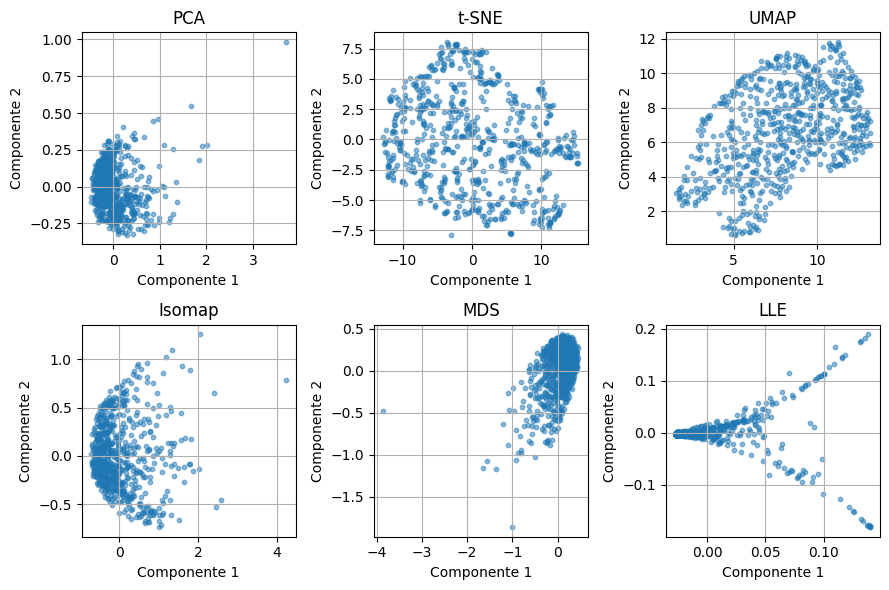

In [9]:
# Graficar todos los resultados
plt.figure(figsize=(9, 6))
for i, (result, title) in enumerate(zip([pca_result, tsne_result, umap_result, isomap_result, mds_result, lle_result],
                                        ['PCA', 't-SNE', 'UMAP', 'Isomap', 'MDS', 'LLE'])):
    plt.subplot(2, 3, i + 1)
    plt.scatter(result[:, 0], result[:, 1], alpha=0.5, s=10)
    plt.title(title)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Probar visualización con distancia de Wasserstein
from scipy.stats import wasserstein_distance

matrices_distancias_Ws = []
for col in dict_columns:
    # Convertir cada diccionario en una lista de valores para calcular la distancia entre distribuciones
    df[col] = df[col].apply(lambda x: np.array(x))
    matrix = squareform(pdist(df[col].tolist(), metric=wasserstein_distance))
    matrices_distancias.append(matrix)

# Promediar las matrices de distancias
matriz_promedio_Ws = np.mean(matrices_distancias, axis=0)

In [11]:
# Aplicar PCA, t-SNE y UMAP, Isomap, MDS y LLE a la matriz de distancias promedio y graficar los resultados
pca = PCA(n_components=2)
pca_result_Ws = pca.fit_transform(matriz_promedio_Ws)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result_Ws = tsne.fit_transform(matriz_promedio_Ws)

umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
umap_result_Ws = umap.fit_transform(matriz_promedio_Ws)

isomap = Isomap(n_components=2, n_neighbors=8)
isomap_result_Ws = isomap.fit_transform(matriz_promedio_Ws)

mds = MDS(n_components=2, n_init=1, max_iter=300)
mds_result_Ws = mds.fit_transform(matriz_promedio_Ws)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5, method='standard')
lle_result_Ws = lle.fit_transform(matriz_promedio_Ws)

c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


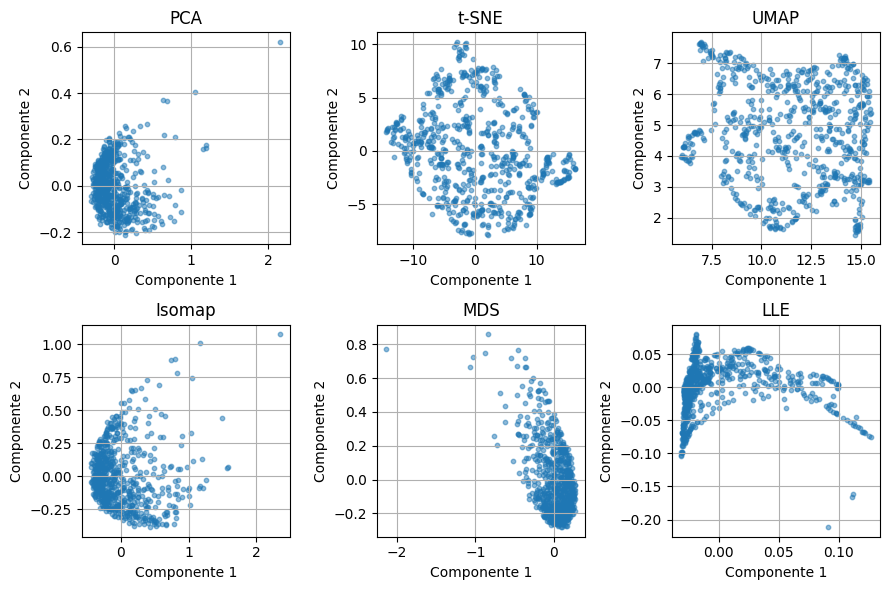

In [12]:
# Graficar todos los resultados con la distancia de Wasserstein
plt.figure(figsize=(9, 6))
for i, (result, title) in enumerate(zip([pca_result_Ws, tsne_result_Ws, umap_result_Ws, isomap_result_Ws, mds_result_Ws, lle_result_Ws],
                                        ['PCA', 't-SNE', 'UMAP', 'Isomap', 'MDS', 'LLE'])):
    plt.subplot(2, 3, i + 1)
    plt.scatter(result[:, 0], result[:, 1], alpha=0.5, s=10)
    plt.title(title)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Probar varias visualizaciones con diferentes parámetros de t-SNE y MDS y UMAP, y graficar juntos

tsne_params = [
    {'perplexity': 5, 'n_iter': 250},
    {'perplexity': 30, 'n_iter': 300},
    {'perplexity': 50, 'n_iter': 500},
    {'perplexity': 100, 'n_iter': 1000}
]

mds_params = [
    {'n_init': 1, 'max_iter': 100},
    {'n_init': 5, 'max_iter': 300},
    {'n_init': 10, 'max_iter': 500},
    {'n_init': 20, 'max_iter': 1000}
]

umap_params = [
    {'n_neighbors': 5, 'min_dist': 0.1},
    {'n_neighbors': 15, 'min_dist': 0.5},
    {'n_neighbors': 30, 'min_dist': 0.9},
    {'n_neighbors': 50, 'min_dist': 0.99}
]

tsne_results = []
mds_results = []
umap_results = []
for params in tsne_params:
    tsne = TSNE(n_components=2, **params)
    tsne_result = tsne.fit_transform(matriz_promedio_JS)
    tsne_results.append(tsne_result)

for params in mds_params:
    mds = MDS(n_components=2, **params)
    mds_result = mds.fit_transform(matriz_promedio_JS)
    mds_results.append(mds_result)

for params in umap_params:
    umap = UMAP(n_components=2, **params)
    umap_result = umap.fit_transform(matriz_promedio_JS)
    umap_results.append(umap_result)

c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value o

KeyboardInterrupt: 

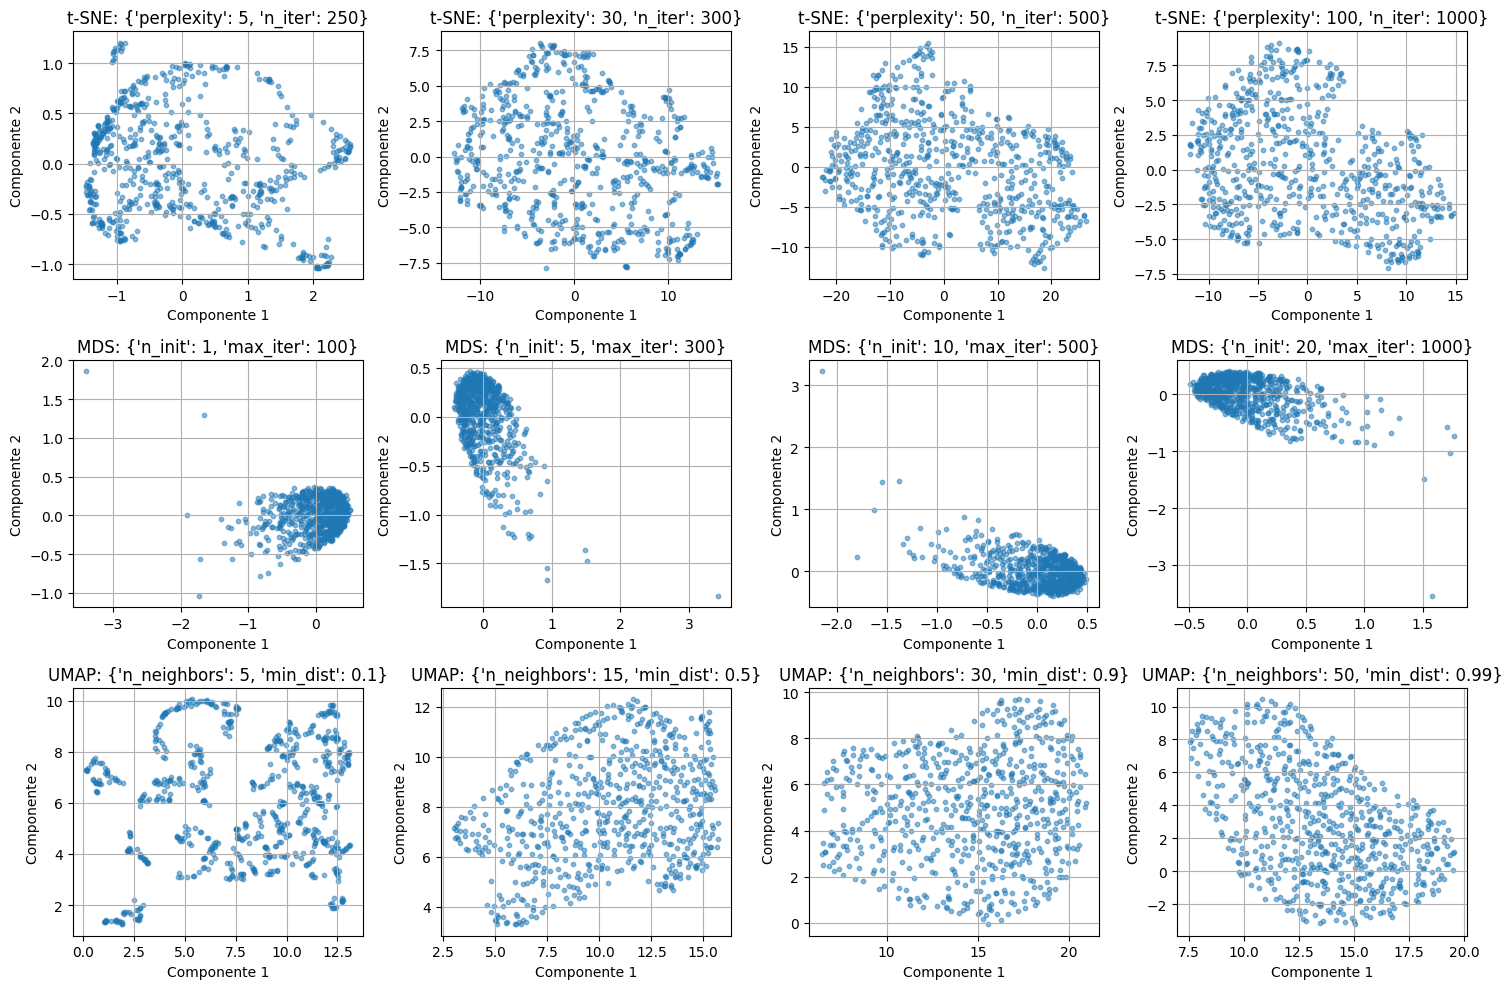

In [ ]:
# Graficar todos los resultados de t-SNE y MDS
plt.figure(figsize=(15, 10))
total_plots = len(tsne_results) + len(mds_results) + len(umap_results)
rows = (total_plots + 3) // 4  # Calculate the number of rows needed for 4 columns

for i, (result, params) in enumerate(zip(tsne_results, tsne_params)):
    plt.subplot(rows, 4, i + 1)
    plt.scatter(result[:, 0], result[:, 1], alpha=0.5, s=10)
    plt.title(f't-SNE: {params}')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)

for i, (result, params) in enumerate(zip(mds_results, mds_params)):
    plt.subplot(rows, 4, len(tsne_results) + i + 1)
    plt.scatter(result[:, 0], result[:, 1], alpha=0.5, s=10)
    plt.title(f'MDS: {params}')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)

for i, (result, params) in enumerate(zip(umap_results, umap_params)):
    plt.subplot(rows, 4, len(tsne_results) + len(mds_results) + i + 1)
    plt.scatter(result[:, 0], result[:, 1], alpha=0.5, s=10)
    plt.title(f'UMAP: {params}')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# Ahora hacemos un análisis de agrupamiento con KMeans, DBSCAN, AgglomerativeClustering y OPTICS
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS
from sklearn.metrics import silhouette_score

# Definir el número de clusters para KMeans y AgglomerativeClustering
n_clusters = 5

# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(matriz_promedio_JS)
kmeans_silhouette = silhouette_score(matriz_promedio_JS, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")


# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(matriz_promedio_JS)
dbscan_silhouette = silhouette_score(matriz_promedio_JS, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

# AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=n_clusters)
agglo_labels = agglo.fit_predict(matriz_promedio_JS)
agglo_silhouette = silhouette_score(matriz_promedio_JS, agglo_labels)
print(f"AgglomerativeClustering Silhouette Score: {agglo_silhouette:.4f}")

# Recordar que el silhouette score es una medida de la calidad del agrupamiento, donde un valor más alto indica un mejor agrupamiento.

c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans Silhouette Score: 0.1969
DBSCAN Silhouette Score: 0.7547
AgglomerativeClustering Silhouette Score: 0.2008


c:\Users\jpcor\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


KMedoids Silhouette Score: 0.0977


c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans Silhouette Score with 2 clusters: 0.4659


c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans Silhouette Score with 3 clusters: 0.3590


c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans Silhouette Score with 4 clusters: 0.2341


c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans Silhouette Score with 5 clusters: 0.1969
AgglomerativeClustering Silhouette Score with 2 clusters: 0.5161


c:\Users\jpcor\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
c:\Users\jpcor\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


AgglomerativeClustering Silhouette Score with 3 clusters: 0.2316
AgglomerativeClustering Silhouette Score with 4 clusters: 0.2351


c:\Users\jpcor\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
c:\Users\jpcor\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


AgglomerativeClustering Silhouette Score with 5 clusters: 0.2008


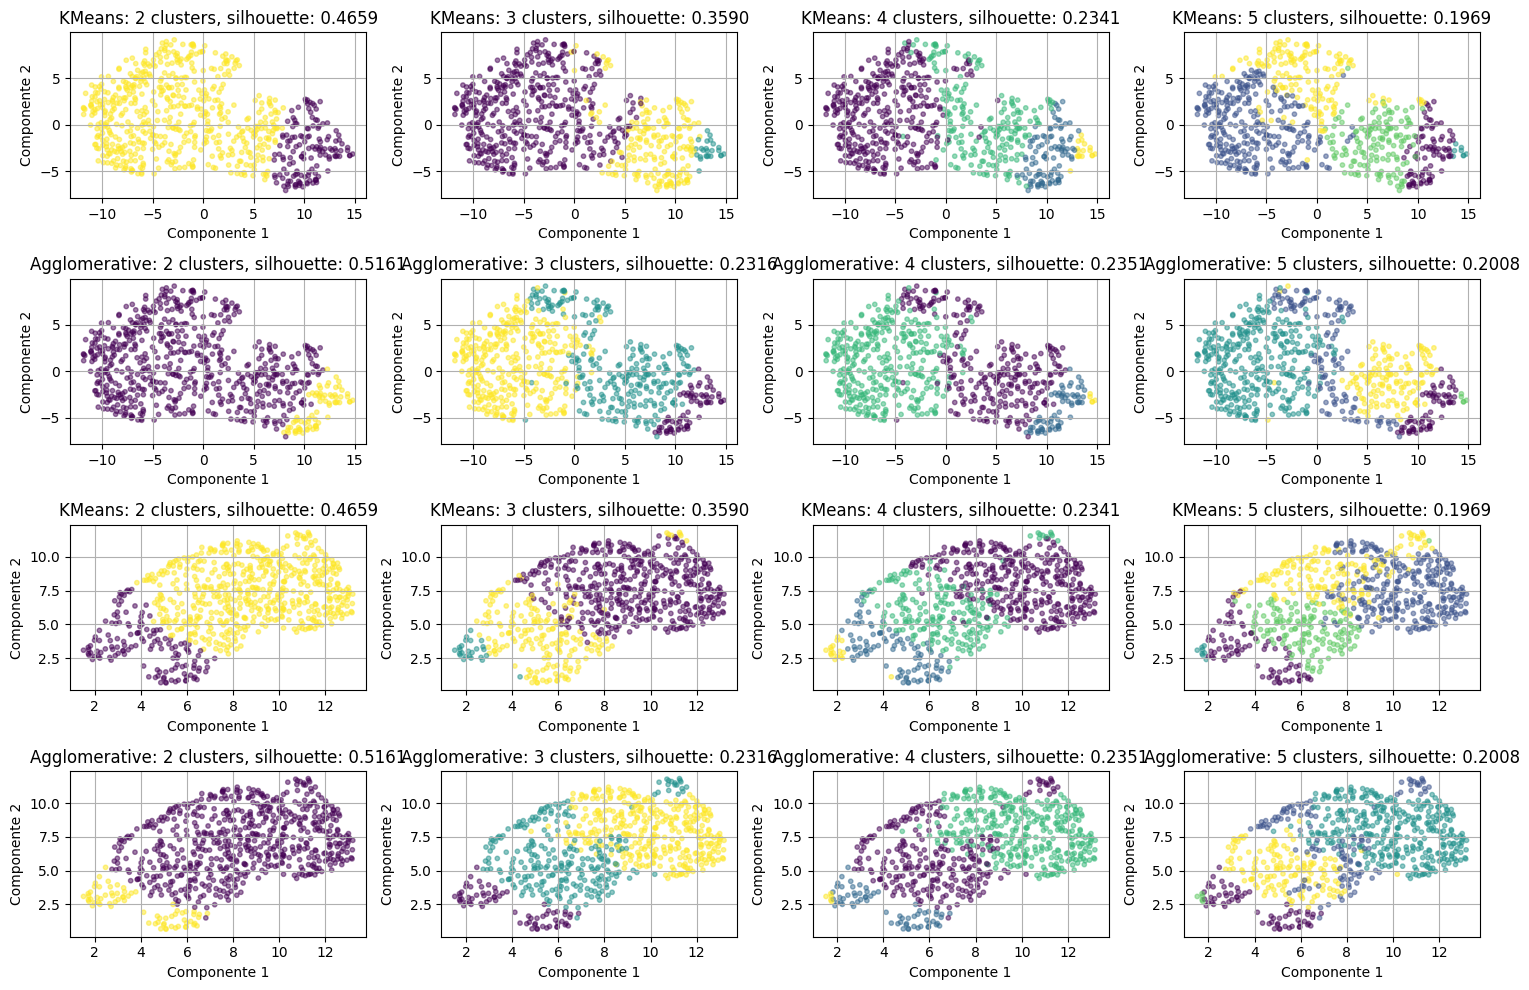

In [25]:
# KMedoids (opcional)
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
kmedoids_labels = kmedoids.fit_predict(matriz_promedio_JS)
kmedoids_silhouette = silhouette_score(matriz_promedio_JS, kmedoids_labels)
print(f"KMedoids Silhouette Score: {kmedoids_silhouette:.4f}")

# Probar con distintos números de clusters para KMeans

kmeans_results = []
kmeans_silhouette_scores = []
for n in range(2, 6):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans_labels = kmeans.fit_predict(matriz_promedio_JS)
    kmeans_silhouette = silhouette_score(matriz_promedio_JS, kmeans_labels)
    print(f"KMeans Silhouette Score with {n} clusters: {kmeans_silhouette:.4f}")
    kmeans_results.append(kmeans_labels)
    kmeans_silhouette_scores.append(kmeans_silhouette)


# Probar con distintos números de clusters para AgglomerativeClustering
agglo_results = []
agglo_silhouette_scores = []
for n in range(2, 6):
    agglo = AgglomerativeClustering(n_clusters=n)
    agglo_labels = agglo.fit_predict(matriz_promedio_JS)
    agglo_silhouette = silhouette_score(matriz_promedio_JS, agglo_labels)
    print(f"AgglomerativeClustering Silhouette Score with {n} clusters: {agglo_silhouette:.4f}")
    agglo_results.append(agglo_labels)
    agglo_silhouette_scores.append(agglo_silhouette)

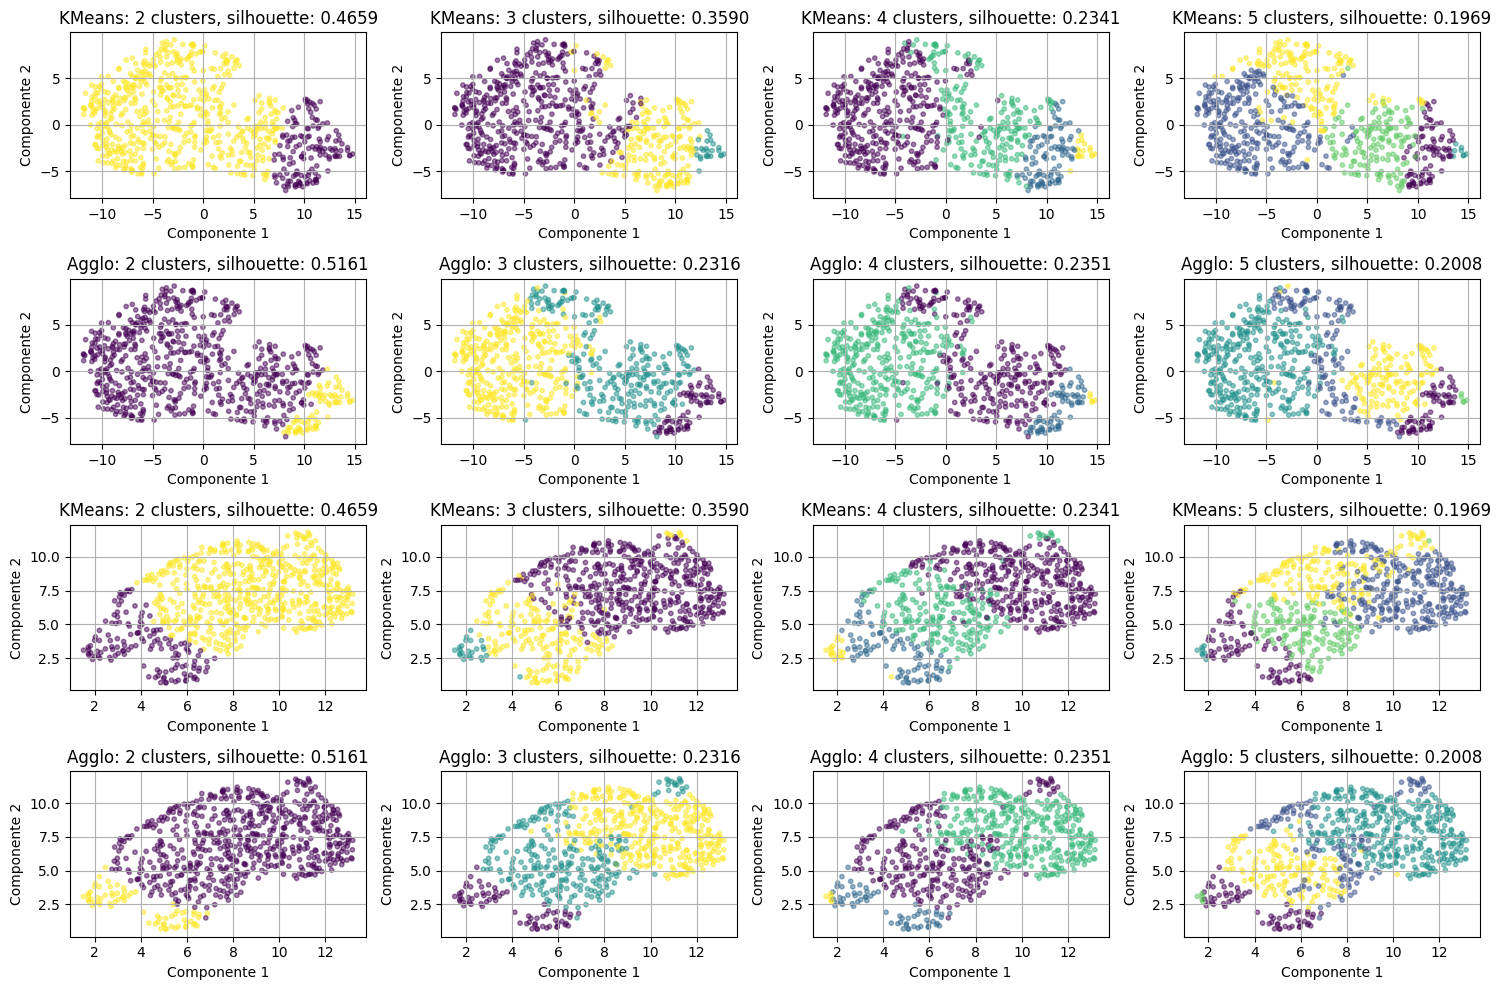

In [26]:

# Graficar los resultados de KMeans y AgglomerativeClustering en t-SNE y UMAP, es decir 4 num de clusters x 2 metodos de agrupamiento x 2 metodos de visualizacion
plt.figure(figsize=(15, 10))
total_plots = (len(kmeans_results) + len(agglo_results))*2
rows = (total_plots + 3) // 4  # Calculate the number of rows needed for 4 columns

for i, (result, labels) in enumerate(zip(kmeans_results, kmeans_results)):
    plt.subplot(rows, 4, i + 1)
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=result, alpha=0.5, s=10)
    plt.title(f'KMeans: {i+2} clusters, silhouette: {kmeans_silhouette_scores[i]:.4f}')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)

for i, (result, labels) in enumerate(zip(agglo_results, agglo_results)):
    plt.subplot(rows, 4, len(kmeans_results) + i + 1)
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=result, alpha=0.5, s=10)
    plt.title(f'Agglo: {i+2} clusters, silhouette: {agglo_silhouette_scores[i]:.4f}')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)

for i, (result, labels) in enumerate(zip(kmeans_results, kmeans_results)):
    plt.subplot(rows, 4, len(kmeans_results) + len(agglo_results) + i + 1)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=result, alpha=0.5, s=10)
    plt.title(f'KMeans: {i+2} clusters, silhouette: {kmeans_silhouette_scores[i]:.4f}')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)

for i, (result, labels) in enumerate(zip(agglo_results, agglo_results)):
    plt.subplot(rows, 4, len(kmeans_results) + len(agglo_results) + len(kmeans_results) + i + 1)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=result, alpha=0.5, s=10)
    plt.title(f'Agglo: {i+2} clusters, silhouette: {agglo_silhouette_scores[i]:.4f}')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
# Agregar etiquetas de los ultimos agrupamientos al df original
for i, kmeans_labels in enumerate(kmeans_results, start=2):
    df[f'kmeans_labels_n={i}'] = kmeans_results[i-2]
for i, agglo_labels in enumerate(agglo_results, start=2):
    df[f'agglo_labels_n={i}'] = agglo_results[i-2]

df

Estacion                                       genero_x_mes  \
0           1  [0.7191808141602378, 0.2695166706850277, 0.011...   
1           2  [0.7239594175503747, 0.26335286886678205, 0.01...   
2           3  [0.7125928887445148, 0.2704237239901104, 0.016...   
3           4  [0.7048419429973869, 0.2855426832222827, 0.009...   
4           5  [0.7129318289632343, 0.270889017527068, 0.0161...   
..        ...                                                ...   
673       708  [0.7406775787197383, 0.2459870954130698, 0.013...   
674       709  [0.715324461517355, 0.26743586225819727, 0.017...   
675       710  [0.6428025646451805, 0.3353892280379237, 0.021...   
676       711  [0.7131167653923917, 0.2638319100740798, 0.023...   
677      1000  [0.6971809639284633, 0.29281600484995457, 0.01...   

                                            edad_x_mes  \
0    [0.011546051250472339, 0.3001973325122808, 0.3...   
1    [0.004660265575877846, 0.30237784466895706, 0....   
2    [0.019435050836540117, 0.44365084653528575, 0....   
3    [0.006723880311099191, 0.3312550567140768, 0.4...   
4    [0.008097944376003753, 0.33255593067323697, 0....   
..                                                 ...   
673  [0.006078693366620369, 0.326715483746198, 0.39...   
674  [0.024008714477392022, 0.42584599850185617, 0....   
675  [0.019089419967239278, 0.3866782761528446, 0.3...   
676  [0.02338800606753786, 0.37492800882550964, 0.3...   
677  [0.030303030303030304, 0.3887878787878788, 0.3...   

                                      duraciones_x_mes  \
0    [0.43389396851206163, 0.36434161785839014, 0.1...   
1    [0.32428428379756186, 0.4379661974998366, 0.15...   
2    [0.37939837662472875, 0.3276180639715916, 0.13...   
3    [0.35653395805655186, 0.4147918772459442, 0.15...   
4    [0.31733459835282757, 0.44956605512447834, 0.1...   
..                                                 ...   
673  [0.27924629476608237, 0.29353100441287644, 0.2...   
674  [0.33584946041833014, 0.3209859267003065, 0.18...   
675  [0.14579166895517856, 0.22497471867458008, 0.2...   
676  [0.1936663989811728, 0.3490720236212169, 0.246...   
677  [0.03544380490760375, 0.0, 0.04544077552256891...   

                                            dias_x_mes  \
0    [0.15507122282387428, 0.1672852119127107, 0.16...   
1    [0.15501323470866926, 0.16876456805618445, 0.1...   
2    [0.13905323800930103, 0.15247171513847435, 0.1...   
3    [0.1447996637492633, 0.1653645965385556, 0.157...   
4    [0.14736482441044352, 0.1652503100729024, 0.16...   
..                                                 ...   
673  [0.16438404332003026, 0.1599887480440936, 0.16...   
674  [0.13865588875261012, 0.1510499411440284, 0.14...   
675  [0.08133640478552066, 0.11523276589008036, 0.1...   
676  [0.14530020258883794, 0.16625466167258482, 0.1...   
677  [0.1415151515151515, 0.22212121212121214, 0.16...   

                                           horas_x_mes  \
0    [0.0057144965511362516, 3.1807283486230945e-05...   
1    [0.009598611794881145, 0.0003798722413677832, ...   
2    [0.007542198412709431, 0.00020823297660710742,...   
3    [0.007606199446944787, 9.352808208835811e-05, ...   
4    [0.005764685476169081, 0.0001044894956710002, ...   
..                                                 ...   
673  [0.006592913936101478, 0.00021976379787004926,...   
674  [0.008505944557704601, 0.00018383815656974463,...   
675  [8.077126869047158e-05, 0.0, 0.0, 0.0, 0.0, 0....   
676  [6.692150918142827e-05, 0.0, 0.0, 0.0, 0.0, 0....   
677  [0.020309184601394362, 0.005153076689906032, 0...   

                                          viajes_x_mes  retiros_x_mes  \
0    [0.1893063890243644, 0.17456901121737103, 0.15...        9426.83   
1    [0.1842885000126624, 0.17704560994757768, 0.14...        2232.50   
2    [0.180514101941186, 0.1763031859512737, 0.1669...        4748.67   
3    [0.18403260338804792, 0.16979679224730496, 0.1...        3265.83   
4    [0.1881682978649298, 0.1772839

In [61]:
# Plot de las distribuciones de las etiquetas de agrupamiento, es decir, los promedios de las distribuciones discretas de cada cluster
n_clusters = 2
clusters_means = []
for i in range(n_clusters):
    cluster = df[df[f'agglo_labels_n={n_clusters}'] == i]
    clusters_means.append({col: np.mean([cluster[col]]) for col in dict_columns})
clusters_means = pd.DataFrame(clusters_means) 
clusters_means  

genero_x_mes  \
0  [0.6940181106405832, 0.2855831868069018, 0.020...   
1  [0.708946519785219, 0.27383993742594515, 0.017...   

                                          edad_x_mes  \
0  [0.015062126510633728, 0.36507652143225006, 0....   
1  [0.017162456534349113, 0.391494306356512, 0.35...   

                                    duraciones_x_mes  \
0  [0.4250057301582372, 0.3352355385788889, 0.144...   
1  [0.27376734056728413, 0.33750104656798585, 0.2...   

                                          dias_x_mes  \
0  [0.15008801327858887, 0.16395072977643552, 0.1...   
1  [0.1457203773482034, 0.16637819395553155, 0.16...   

                                         horas_x_mes  \
0  [0.005594414368865175, 0.00015186734483505198,...   
1  [0.0034801962792136622, 0.00020670689658587807...   

                                        viajes_x_mes  
0  [0.18446961509607146, 0.1749373460162218, 0.15...  
1  [0.1911585292582448, 0.17627184899404502, 0.14...

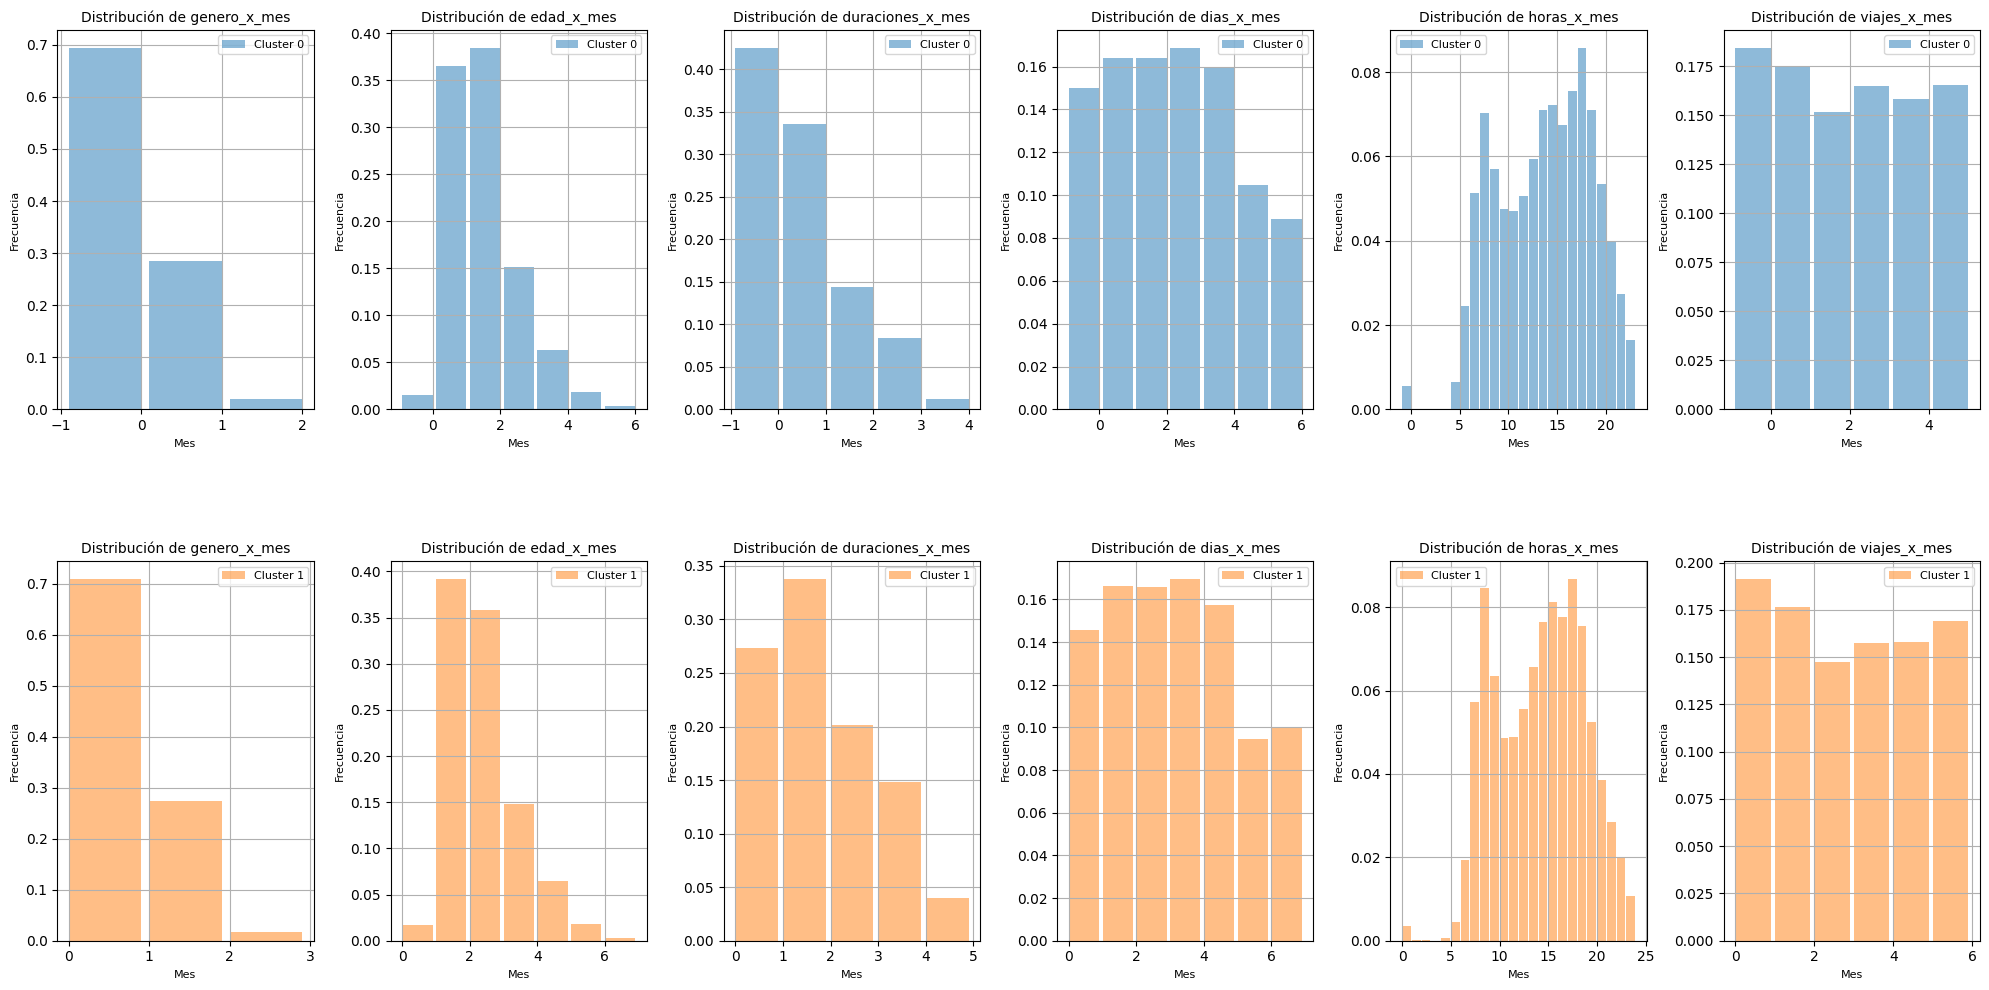

In [71]:
# Create a single figure with 12 subplots (2 rows x 6 columns)
figure, axes = plt.subplots(2, 6, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Width of each bar
bar_width = 0.9
for j in range(n_clusters):
    for i, col in enumerate(dict_columns):
        # Extract the y values for the current cluster
        y = clusters_means[col].iloc[j]  # Access the column and row for the cluster
        x = np.arange(len(y))  # Ensure x matches the length of y
        
        # Offset the x positions for each cluster
        x_offset = x + (j * bar_width) - (bar_width * (n_clusters - 1) / 2)
        
        # Plot the bars
        axes[i + j * 6].bar(x_offset, y, width=bar_width, color=f"C{j}", alpha=0.5, label=f"Cluster {j}")
    
        # Set titles and labels for each subplot
        axes[i + j * 6].set_title(f"Distribución de {col}", fontsize=10)
        axes[i + j * 6].set_xlabel("Mes", fontsize=8)
        axes[i + j * 6].set_ylabel("Frecuencia", fontsize=8)
        axes[i + j * 6].legend(fontsize=8)
        axes[i + j * 6].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
figure.subplots_adjust(hspace=0.4, wspace=0.3)  # Add extra spacing between subplots
plt.show()


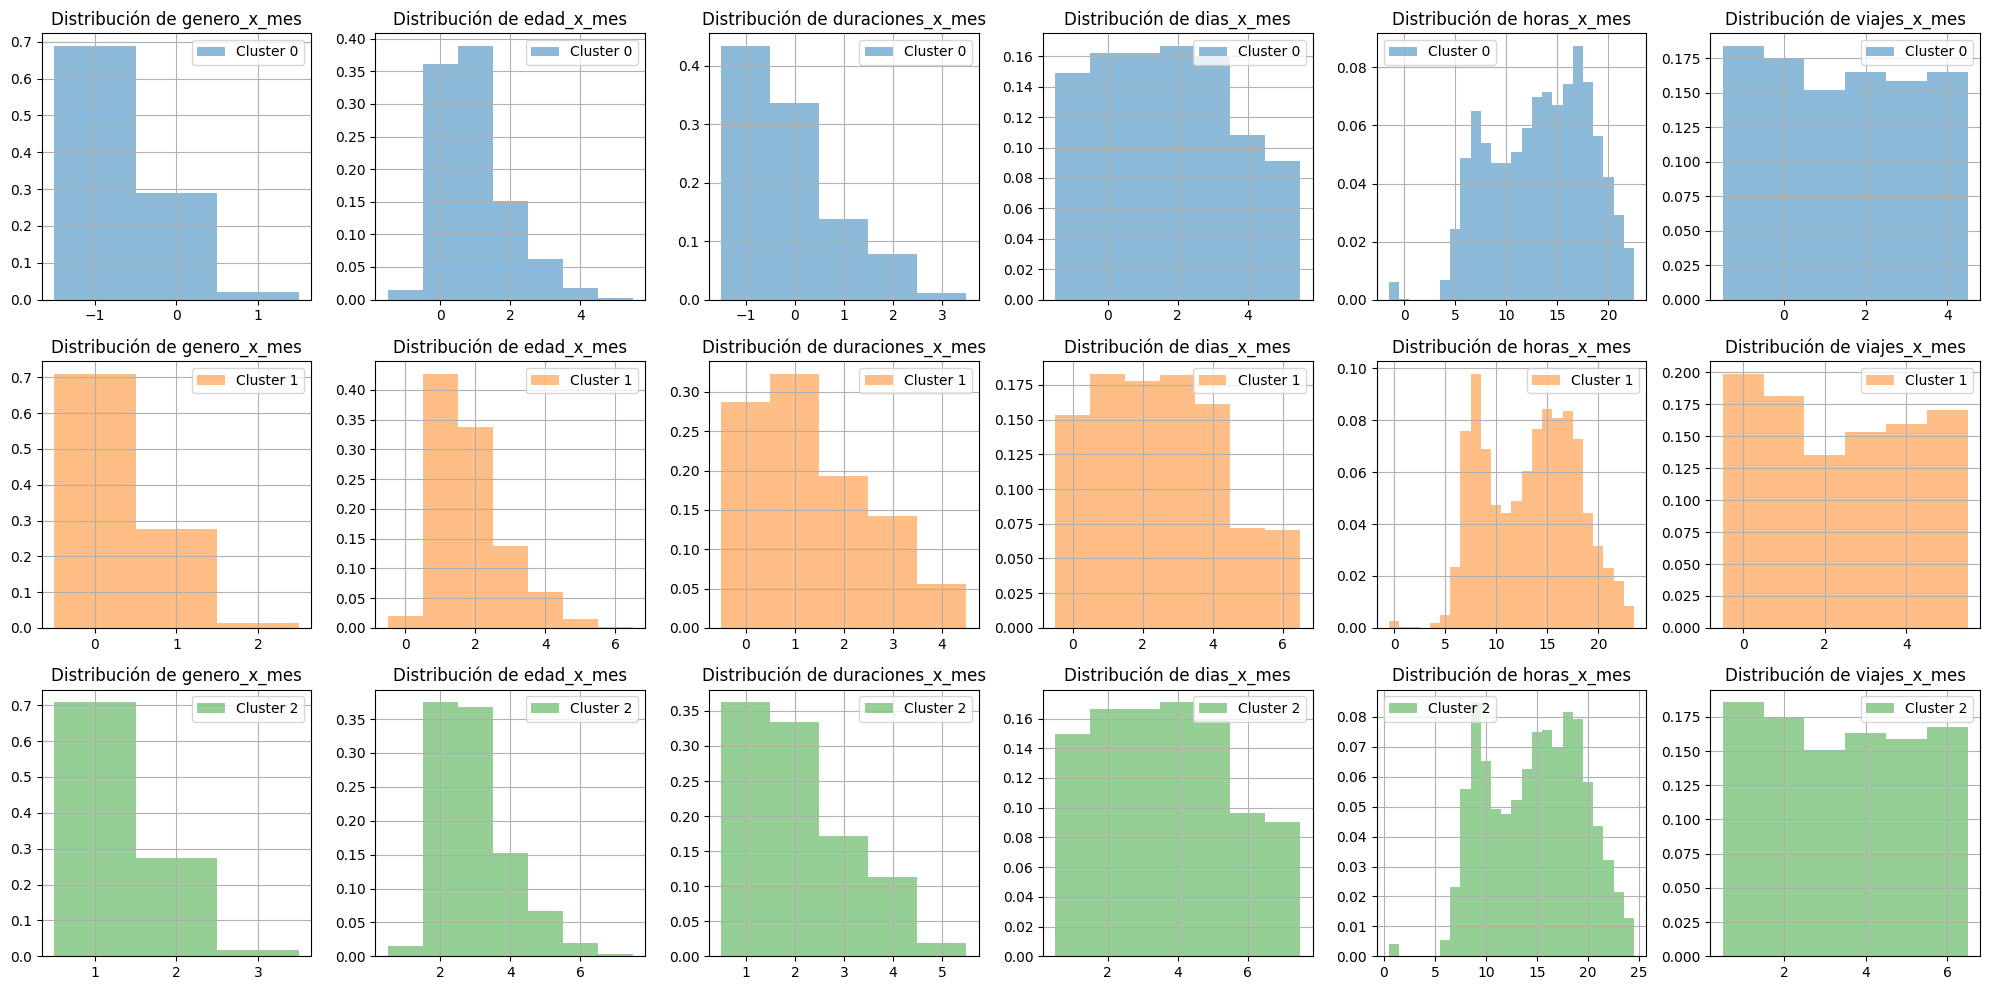

In [ ]:
n_clusters = 3
clusters_means = []
for i in range(n_clusters):
    cluster = df[df[f'kmeans_labels_n={n_clusters}'] == i]
    clusters_means.append({col: np.mean([cluster[col]]) for col in dict_columns})
clusters_means = pd.DataFrame(clusters_means) 
clusters_means 

# Create a single figure with 18 subplots (3 rows x 6 columns)
figure, axes = plt.subplots(3, 6, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Width of each bar
bar_width = 1
for j in range(n_clusters):
    for i, col in enumerate(dict_columns):
        # Extract the y values for the current cluster
        y = clusters_means[col].iloc[j]  # Access the column and row for the cluster
        x = np.arange(len(y))  # Ensure x matches the length of y
        
        # Offset the x positions for each cluster
        x_offset = x + (j * bar_width) - (bar_width * (n_clusters - 1) / 2)
        
        # Plot the bars
        axes[i+j*6].bar(x_offset, y, width=bar_width, color=f"C{j}", alpha=0.5, label=f"Cluster {j}")
        axes[i+j*6].set_title(f"Distribución de {col}")
        axes[i+j*6].set_title(f"Distribución de {col}")
        axes[i+j*6].legend()
        axes[i+j*6].grid(True)    

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

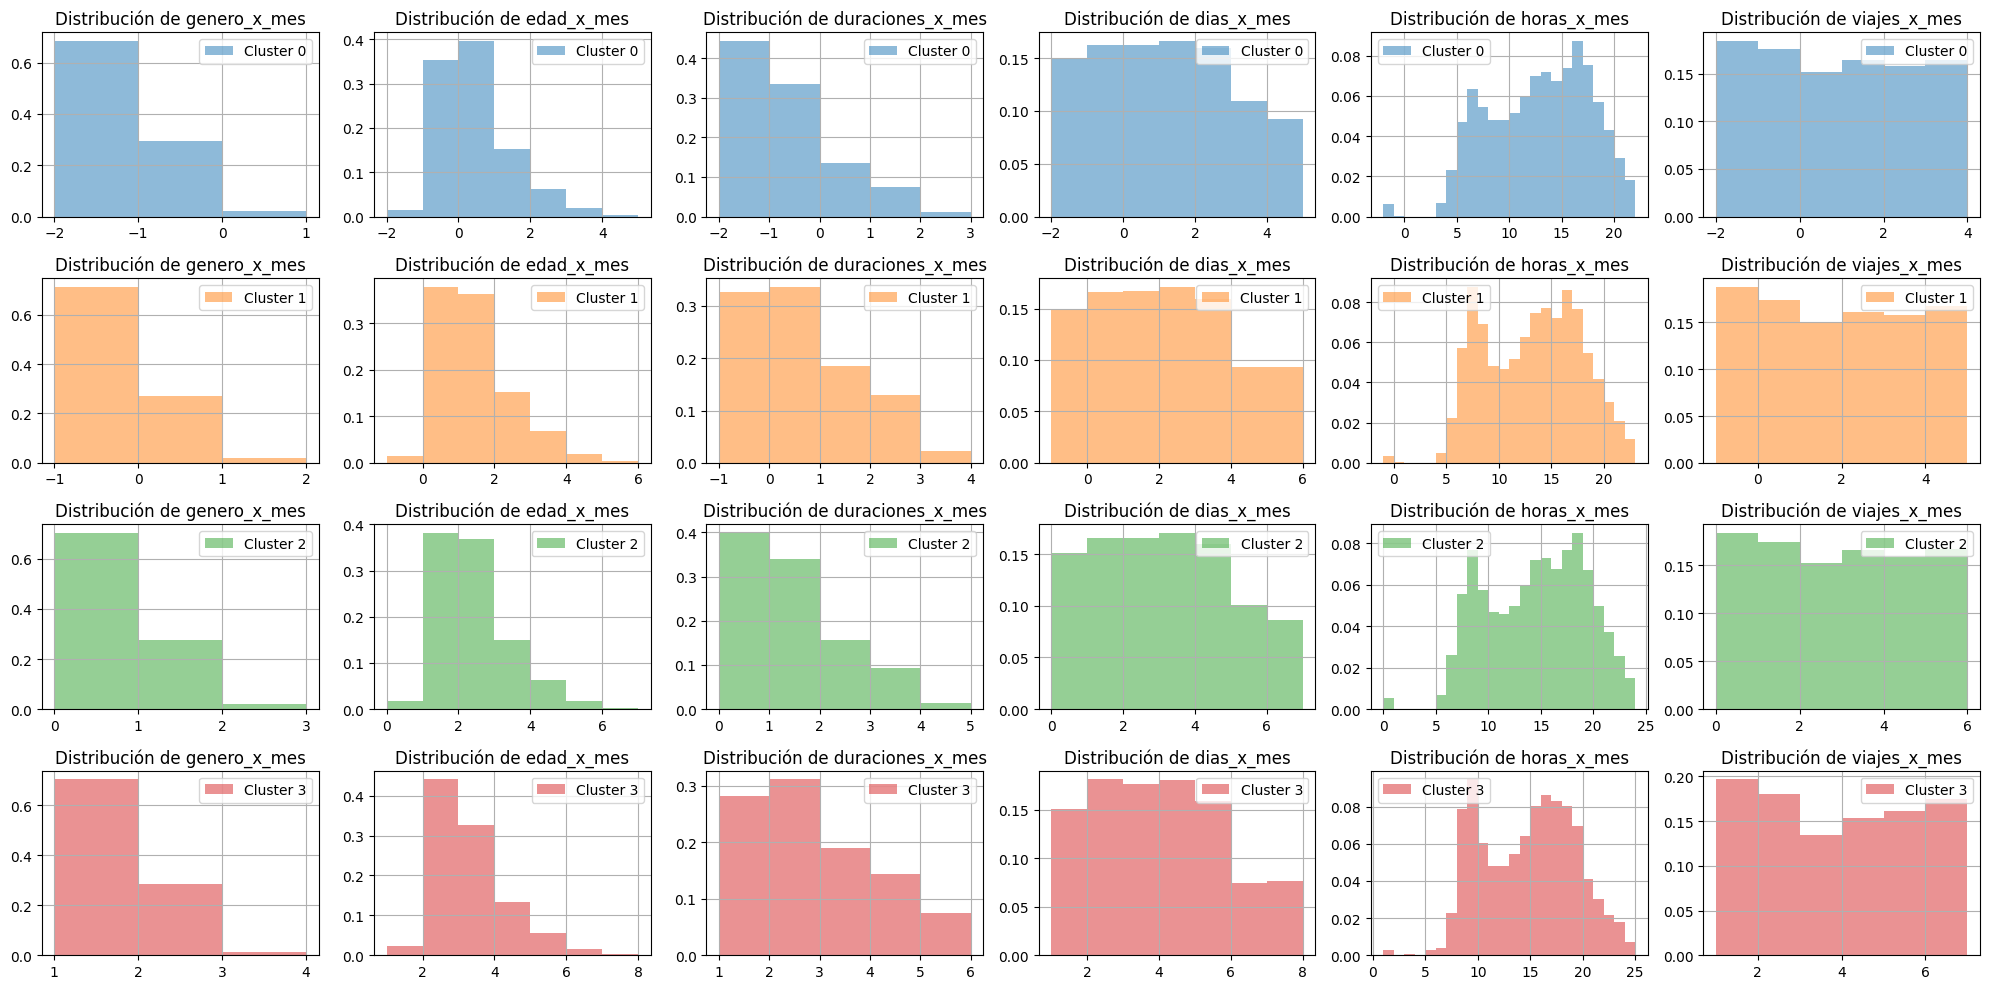

In [75]:
n_clusters = 4
clusters_means = []
for i in range(n_clusters):
    cluster = df[df[f'kmeans_labels_n={n_clusters}'] == i]
    clusters_means.append({col: np.mean([cluster[col]]) for col in dict_columns})
clusters_means = pd.DataFrame(clusters_means) 
clusters_means 

# Create a single figure with 18 subplots (3 rows x 6 columns)
figure, axes = plt.subplots(n_clusters, 6, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Width of each bar
bar_width = 1
for j in range(n_clusters):
    for i, col in enumerate(dict_columns):
        # Extract the y values for the current cluster
        y = clusters_means[col].iloc[j]  # Access the column and row for the cluster
        x = np.arange(len(y))  # Ensure x matches the length of y
        
        # Offset the x positions for each cluster
        x_offset = x + (j * bar_width) - (bar_width * (n_clusters - 1) / 2)
        
        # Plot the bars
        axes[i+j*6].bar(x_offset, y, width=bar_width, color=f"C{j}", alpha=0.5, label=f"Cluster {j}")
        axes[i+j*6].set_title(f"Distribución de {col}")
        axes[i+j*6].set_title(f"Distribución de {col}")
        axes[i+j*6].legend()
        axes[i+j*6].grid(True)    

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

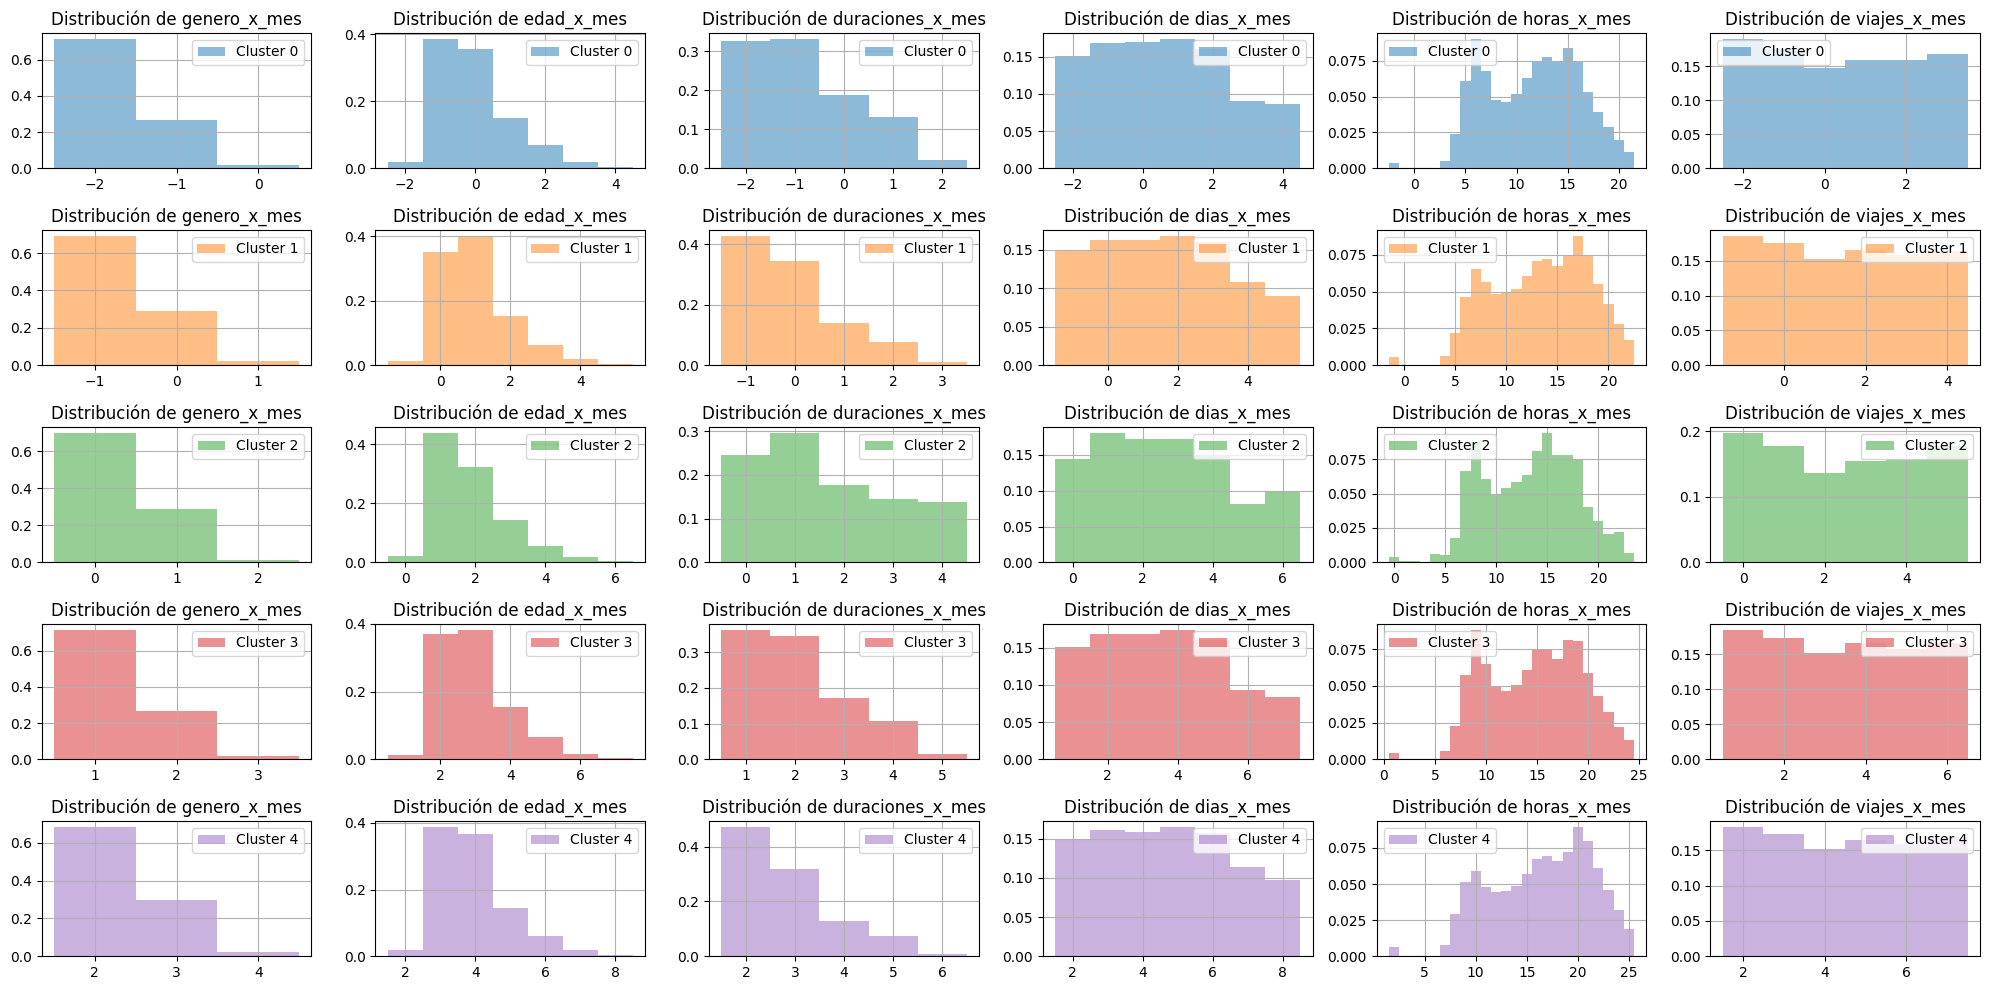

In [76]:
n_clusters = 5
clusters_means = []
for i in range(n_clusters):
    cluster = df[df[f'kmeans_labels_n={n_clusters}'] == i]
    clusters_means.append({col: np.mean([cluster[col]]) for col in dict_columns})
clusters_means = pd.DataFrame(clusters_means) 
clusters_means 

# Create a single figure with 18 subplots (3 rows x 6 columns)
figure, axes = plt.subplots(n_clusters, 6, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Width of each bar
bar_width = 1
for j in range(n_clusters):
    for i, col in enumerate(dict_columns):
        # Extract the y values for the current cluster
        y = clusters_means[col].iloc[j]  # Access the column and row for the cluster
        x = np.arange(len(y))  # Ensure x matches the length of y
        
        # Offset the x positions for each cluster
        x_offset = x + (j * bar_width) - (bar_width * (n_clusters - 1) / 2)
        
        # Plot the bars
        axes[i+j*6].bar(x_offset, y, width=bar_width, color=f"C{j}", alpha=0.5, label=f"Cluster {j}")
        axes[i+j*6].set_title(f"Distribución de {col}")
        axes[i+j*6].set_title(f"Distribución de {col}")
        axes[i+j*6].legend()
        axes[i+j*6].grid(True)    

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()